In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)



In [68]:
# df = pd.read_csv('cleaned.csv', index_col=0)

In [69]:
# df = pd.read_csv('Cleaned Data Folder/df_share.csv', index_col=0)

In [70]:
df = pd.read_csv('Data/df_share2.csv', index_col=0)

C:\Users\bobev\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7,8,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event.Id                 88889 non-null  object 
 1   Investigation.Type       88889 non-null  object 
 2   Accident.Number          88889 non-null  object 
 3   Event.Date               88889 non-null  object 
 4   Location                 88837 non-null  object 
 5   Country                  88663 non-null  object 
 6   Latitude                 34382 non-null  object 
 7   Longitude                34373 non-null  object 
 8   Airport.Code             50249 non-null  object 
 9   Airport.Name             52790 non-null  object 
 10  Injury.Severity          87889 non-null  object 
 11  Aircraft.damage          85695 non-null  object 
 12  Aircraft.Category        32287 non-null  object 
 13  Registration.Number      87572 non-null  object 
 14  Make                  

In [72]:
df = df.drop(['Latitude','Longitude','Report.Status'], axis=1)

In [73]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Weather.Condition,Broad.phase.of.flight,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,year,total_pop,fatal_perc_pop
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal,Destroyed,...,UNK,Cruise,NaN,0.003984,0.000000,0.0,0.0,1948,2.0,0.000370
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal,Destroyed,...,UNK,Unknown,19-09-1996,0.007968,0.000000,0.0,0.0,1962,4.0,0.000739
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal,Destroyed,...,IMC,Cruise,26-02-2007,0.005976,0.000000,0.0,0.0,1974,3.0,0.000555
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal,Destroyed,...,IMC,Cruise,12-09-2000,0.003984,0.000000,0.0,0.0,1977,2.0,0.000370
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal,Destroyed,...,VMC,Approach,16-04-1980,0.001992,0.009356,0.0,0.0,1979,3.0,0.000185


In [74]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [75]:
type(df['Event.Date'])

pandas.core.series.Series

In [76]:
df['Event_Month'] = df['Event.Date'].dt.month

In [77]:
df['Event_Year'] = df['Event.Date'].dt.year

In [78]:
df['Event_Month']

0        10
1         7
2         8
3         6
4         8
         ..
88884    12
88885    12
88886    12
88887    12
88888    12
Name: Event_Month, Length: 88889, dtype: int64

In [79]:
# def month_to_season(month):
#     if month in [12, 1, 2]:
#         return 'Winter'
#     elif month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     elif month in [9, 10, 11]:
#         return 'Fall'
#     else:
#         return 'Invalid month'

In [80]:
# df['season'] = df['Event_Month'].apply(lambda x: month_to_season(x))

In [81]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,year,total_pop,fatal_perc_pop,Event_Month,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal,Destroyed,...,NaN,0.003984,0.000000,0.0,0.0,1948,2.0,0.000370,10,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal,Destroyed,...,19-09-1996,0.007968,0.000000,0.0,0.0,1962,4.0,0.000739,7,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal,Destroyed,...,26-02-2007,0.005976,0.000000,0.0,0.0,1974,3.0,0.000555,8,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal,Destroyed,...,12-09-2000,0.003984,0.000000,0.0,0.0,1977,2.0,0.000370,6,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal,Destroyed,...,16-04-1980,0.001992,0.009356,0.0,0.0,1979,3.0,0.000185,8,1979


In [82]:
Make_Month_df = df.groupby(['Make', 'Event_Month']).size().reset_index(name='Count')

In [83]:
Make_Month_df.sort_values(by='Count', ascending=False).head()

,Make,Event_Month,Count
2213,Cessna,7,3038
2214,Cessna,8,2950
2212,Cessna,6,2773
2211,Cessna,5,2564
2215,Cessna,9,2522


In [84]:
Month_df = df.groupby(['Event_Month']).size().reset_index(name='Count')

In [85]:
Month_df

,Event_Month,Count
0,1,4985
1,2,5285
2,3,6686
3,4,7248
4,5,8514
5,6,9561
6,7,10698
7,8,9986
8,9,8346
9,10,6982


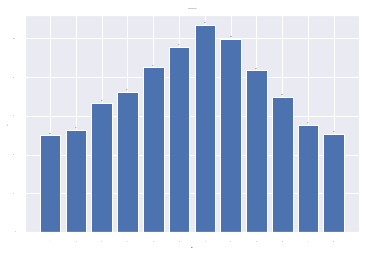

In [86]:
Month_df = pd.DataFrame(Month_df)


plt.bar(Month_df['Event_Month'], Month_df['Count']) #, color='blue')


plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents by Month')

plt.xticks(range(1, 13), range(1, 13))

for i, v in enumerate(Month_df['Count']):
    plt.text(i + 1, v + 100, '{:,}'.format(v), color='black', ha='center')

plt.show()

In [87]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,year,total_pop,fatal_perc_pop,Event_Month,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal,Destroyed,...,NaN,0.003984,0.000000,0.0,0.0,1948,2.0,0.000370,10,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal,Destroyed,...,19-09-1996,0.007968,0.000000,0.0,0.0,1962,4.0,0.000739,7,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal,Destroyed,...,26-02-2007,0.005976,0.000000,0.0,0.0,1974,3.0,0.000555,8,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal,Destroyed,...,12-09-2000,0.003984,0.000000,0.0,0.0,1977,2.0,0.000370,6,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal,Destroyed,...,16-04-1980,0.001992,0.009356,0.0,0.0,1979,3.0,0.000185,8,1979


In [88]:
Year_df = df.groupby(['Event_Year']).size().reset_index(name='Count')


In [89]:
Year_df

,Event_Year,Count
0,1948,1
1,1962,1
2,1974,1
3,1977,1
4,1979,2
5,1981,1
6,1982,3593
7,1983,3556
8,1984,3457
9,1985,3096


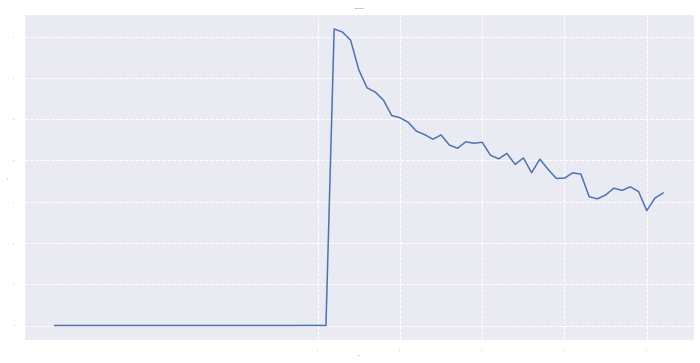

In [90]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data as a line chart
ax.plot(Year_df['Event_Year'], Year_df['Count'])

# Set the title and axis labels
ax.set_title('Event Count by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Add gridlines and customize the ticks
ax.grid(True, linestyle='--')
ax.set_xticks(range(1980, 2030, 10))
ax.set_yticks(range(0, 4000, 500))

# Show the plot
plt.show()

In [91]:
type(Year_df)

pandas.core.frame.DataFrame

In [92]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,year,total_pop,fatal_perc_pop,Event_Month,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal,Destroyed,...,NaN,0.003984,0.000000,0.0,0.000000,1948,2.0,0.000370,10,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal,Destroyed,...,19-09-1996,0.007968,0.000000,0.0,0.000000,1962,4.0,0.000739,7,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal,Destroyed,...,26-02-2007,0.005976,0.000000,0.0,0.000000,1974,3.0,0.000555,8,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal,Destroyed,...,12-09-2000,0.003984,0.000000,0.0,0.000000,1977,2.0,0.000370,6,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal,Destroyed,...,16-04-1980,0.001992,0.009356,0.0,0.000000,1979,3.0,0.000185,8,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,29-12-2022,0.000000,0.004678,0.0,0.000000,2022,1.0,0.000000,12,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.0,0.000000,2022,0.0,0.000000,12,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,27-12-2022,0.000000,0.000000,0.0,0.000226,2022,1.0,0.000000,12,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.0,0.000000,2022,0.0,0.000000,12,2022


In [93]:
Make_Year_df = df.groupby(['Make', 'Event_Year']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

In [94]:
Make_Year_df

,Make,Event_Year,Count
2787,Cessna,1982,1332
2788,Cessna,1983,1254
2789,Cessna,1984,1231
2790,Cessna,1985,1163
2791,Cessna,1986,1032
...,...,...,...
5807,Goldman,2003,1
5809,Golias,2002,1
5810,Golightly,1993,1
5811,"Golightly, robert b.",1992,1


In [95]:
# Make_Year_df = df.groupby(['Make', 'Event_Year']).size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(20)

In [96]:
#Keeps top 20 aircraft

# makes_to_keep = ['cessna', 'piper', 'boeing', 'mooney', 'bellanca', 'grumman', 'airbus', 'maule', 'aeronca', 'air tractor', 'cirrus design corp', 'beech' ,'bell', 'champion', 'luscombe', 'embraer', 'stinson', 'cirrus', 'vans', 'north american', 'mcdonnell douglas']

In [97]:
Make_Year_df.loc[:, 'Make'] = Make_Year_df['Make'].str.lower()

In [98]:
#Keeps top 38 aircraft and helicopter


makes_to_keep = ['cessna', 'piper', 'boeing', 'mooney', 'bellanca', 'grumman', 'airbus', 'maule', 'aeronca', 'air tractor', 'cirrus design corp', 'beech', 'champion', 'luscombe', 'embraer', 'stinson', 'cirrus', 'vans', 'north american', 'mcdonnell douglas', 'bell', 'robinson', 'hughes', 'eurocopter', 'schweizer', 'sikorsky', 'aerospatiale', 'enstrom', 'hiller', 'md helicopter', 'agusta', 'rotorway', 'eurocopter deutschland gmbh', 'brantly', 'eurocopter france', 'airbus helicopters', 'garlick', 'mbb']


In [99]:
len(makes_to_keep)

38

In [100]:
Make_Year_df = Make_Year_df.loc[Make_Year_df['Make'].isin(makes_to_keep)]

In [101]:
Make_Year_df

,Make,Event_Year,Count
2787,cessna,1982,1332
2788,cessna,1983,1254
2789,cessna,1984,1231
2790,cessna,1985,1163
2791,cessna,1986,1032
...,...,...,...
4804,eurocopter france,2011,1
4805,eurocopter france,2013,1
4784,eurocopter deutschland gmbh,2002,1
4750,eurocopter,1996,1


In [102]:
Make_Year_df.head(30)

,Make,Event_Year,Count
2787,cessna,1982,1332
2788,cessna,1983,1254
2789,cessna,1984,1231
2790,cessna,1985,1163
2791,cessna,1986,1032
2792,cessna,1987,1013
2793,cessna,1988,985
2795,cessna,1990,908
2794,cessna,1989,898
2796,cessna,1991,866


In [103]:
# Make_Year_df['Event_Year'] = pd.to_datetime(Make_Year_df['Event_Year'], format='%Y')

In [104]:
# df['Event_Year'] = pd.to_numeric(df['Event_Year'], errors='coerce')

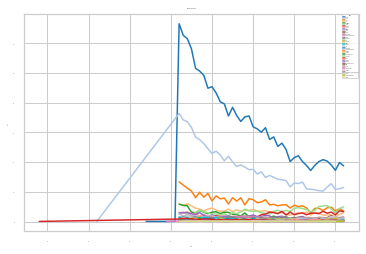

In [105]:
import seaborn as sns

df1 = pd.DataFrame(Make_Year_df)

# Set the plotting style
sns.set_style("whitegrid")

# Create the line plot with Seaborn
sns.lineplot(data=Make_Year_df, x='Event_Year', y='Count', hue='Make', palette='tab20')

# Set the title and axis labels
plt.title('Event Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

In [106]:
# Make_Year_df = Make_Year_df[Make_Year_df['Event_Year'] >= 1985]

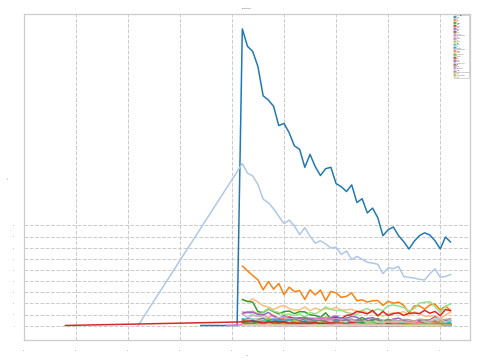

In [107]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))


sns.lineplot(x="Event_Year", y="Count", hue="Make", data=Make_Year_df, ax=ax, palette="tab20")


ax.set_title('Event Count by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')


ax.grid(True, linestyle='--')
ax.set_xticks(range(1940, 2030, 10))
ax.set_yticks(range(0, 500, 50))


plt.show()

In [108]:
df_graph = Make_Year_df[Make_Year_df['Event_Year'] >= 1980]

In [109]:
pwd

'C:\\Users\\bobev\\Documents\\Flatiron\\Project\\dsc-phase-1-project-v3'

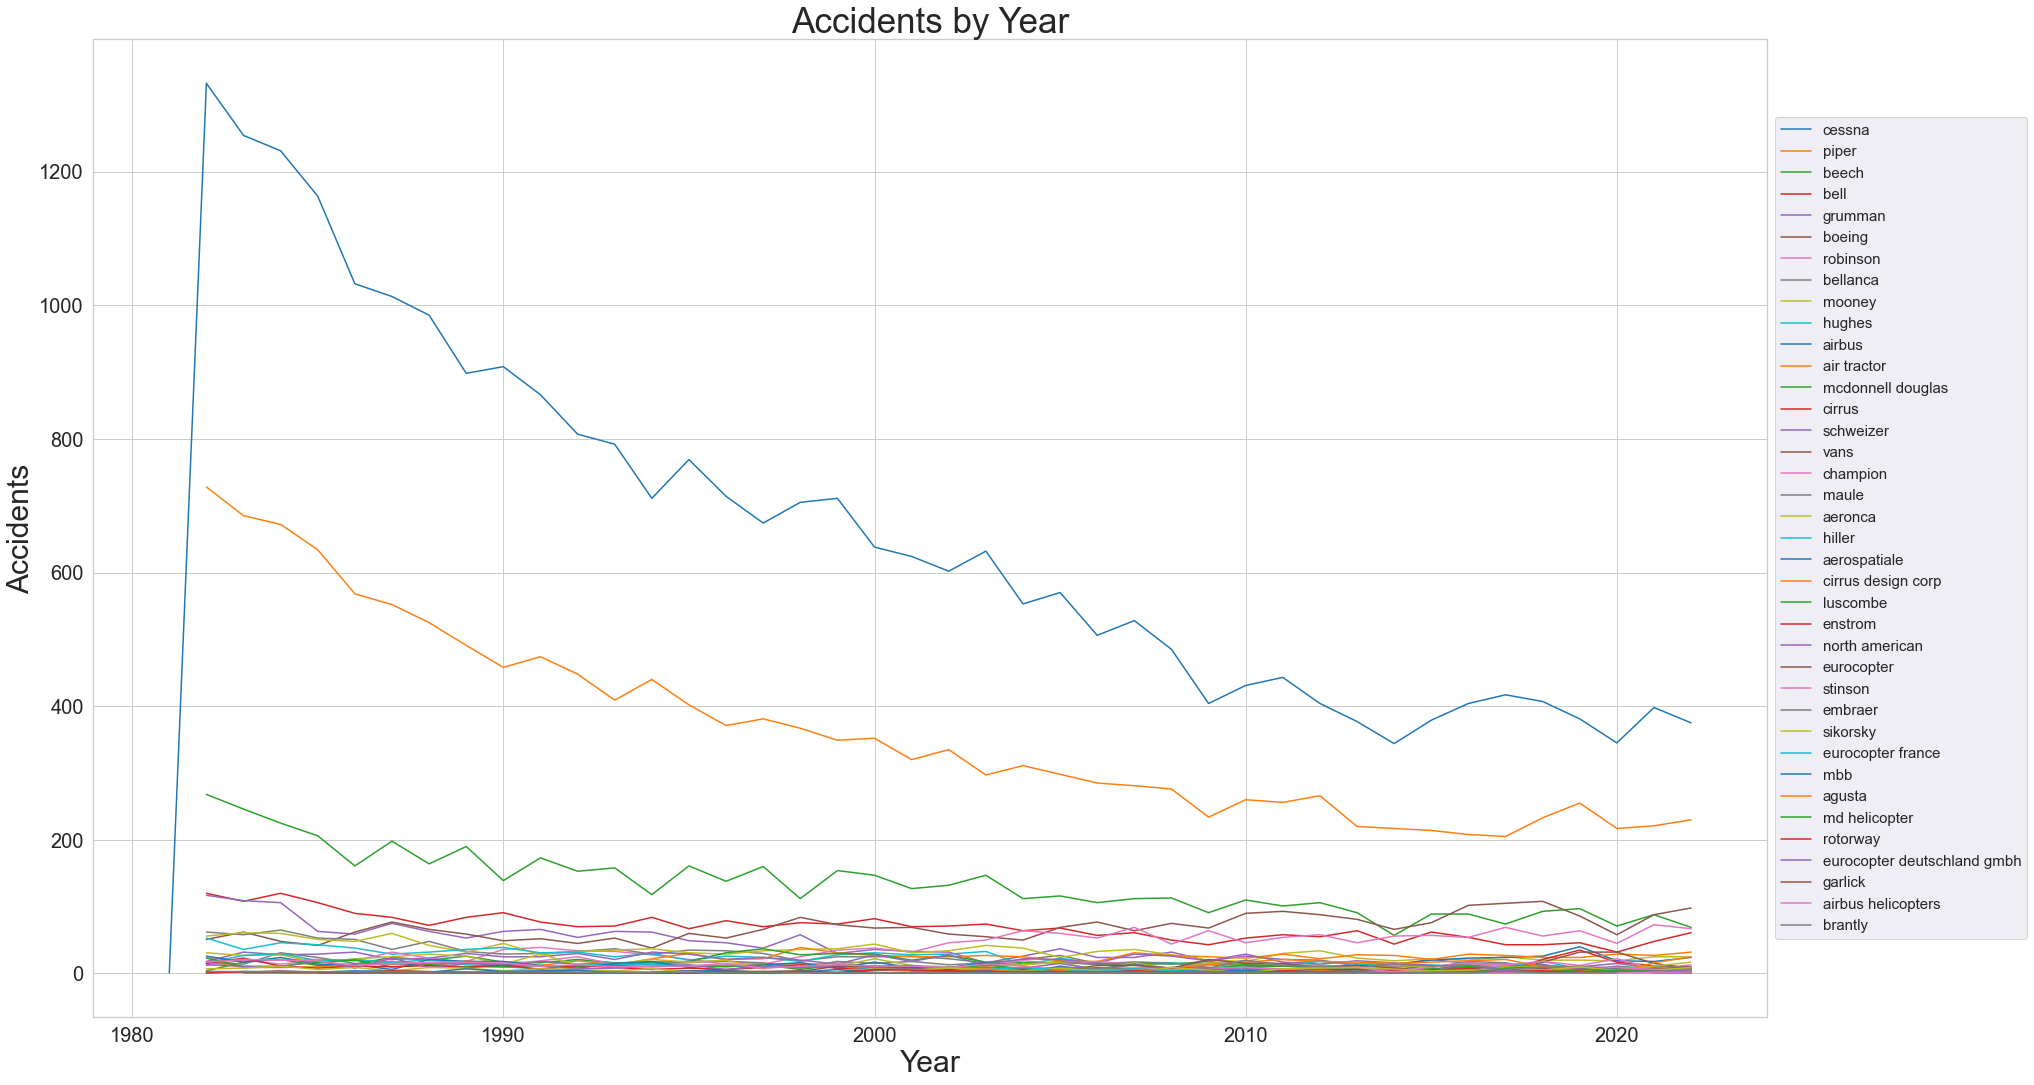

In [139]:


sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(30, 18))

# plt.figure(figsize=(12, 8))


sns.lineplot(x="Event_Year", y="Count", hue="Make", data=df_graph, palette=sns.color_palette("tab10", n_colors=len(Make_Year_df['Make'].unique())))


sns.set(font_scale = 1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Accidents by Year', fontsize=35)
plt.xlabel('Year', fontsize=30)
# plt.xlabel('Year')
plt.ylabel('Accidents', fontsize=30)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

figure = ax.get_figure()
figure.savefig('test5000.png', dpi=800)

plt.show()

In [111]:
#Data high level look

In [112]:
#Data by make high level

In [ ]:
#Cut data by time as a result

In [ ]:
#Engine Look

In [ ]:
#Dive into Engine by make (based on engine look)

In [ ]:
#Make, Engine Count, and Aircraft.Category

In [ ]:
#Create Recomendation based on such